In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mplfinance as mpf
import yfinance
import ta
from datetime import datetime
import config
import MetaTrader5 as mt5
from tqdm import tqdm
from pandas.plotting import scatter_matrix

# Initialize MT5

In [2]:
if not mt5.initialize(config.PATH,
                      login=config.USERNAME,
                      password=config.PASSWORD,
                      server=config.SERVER
                      ):
    print("initialize() failed")
    mt5.shutdown()
# request connection status and parameters
print(mt5.terminal_info())
# get data on MetaTrader 5 version
print(mt5.version())

TerminalInfo(community_account=False, community_connection=False, connected=True, dlls_allowed=False, trade_allowed=False, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=False, build=2715, maxbars=100000, codepage=0, ping_last=196367, community_balance=0.0, retransmission=0.26484476749685315, company='MetaQuotes Software Corp.', name='MetaTrader 5', language='English', path='C:\\Program Files\\MetaTrader 5', data_path='C:\\Users\\ChiChaChai\\AppData\\Roaming\\MetaQuotes\\Terminal\\D0E8209F77C8CF37AD8BF550E51FF075', commondata_path='C:\\Users\\ChiChaChai\\AppData\\Roaming\\MetaQuotes\\Terminal\\Common')
(500, 2715, '26 Nov 2020')


# Import data

In [3]:
symbols = ['AUDUSDm', 'EURUSDm', 'GBPUSDm']

start_date =  datetime(2019, 1, 1)
timeframe = mt5.TIMEFRAME_H1
dfs = []
ohlc_cols = []
for symbol in tqdm(symbols):
    df = pd.DataFrame(mt5.copy_rates_range(symbol, timeframe, start_date, datetime.now()))
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    df = df[['open', 'high', 'low', 'close']]
    df.rename(columns=lambda col: f'{symbol}_{col}', inplace=True)
    ohlc_cols.extend(df.columns)
    dfs.append(df)
        
df = pd.concat(dfs, axis=1)
df

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 75.05it/s]


,AUDUSDm_open,AUDUSDm_high,AUDUSDm_low,AUDUSDm_close,EURUSDm_open,EURUSDm_high,EURUSDm_low,EURUSDm_close,GBPUSDm_open,GBPUSDm_high,GBPUSDm_low,GBPUSDm_close
time,,,,,,,,,,,,
2018-12-31 17:00:00,0.70455,0.70470,0.70401,0.70417,1.14541,1.14561,1.14442,1.14507,1.27571,1.27601,1.27295,1.27454
2018-12-31 18:00:00,0.70419,0.70463,0.70394,0.70426,1.14509,1.14545,1.14420,1.14446,1.27449,1.27513,1.27286,1.27393
2018-12-31 19:00:00,0.70427,0.70470,0.70414,0.70449,1.14447,1.14557,1.14435,1.14530,1.27395,1.27578,1.27250,1.27510
2018-12-31 20:00:00,0.70449,0.70467,0.70423,0.70436,1.14532,1.14607,1.14532,1.14557,1.27510,1.27528,1.27443,1.27447
2018-12-31 21:00:00,0.70436,0.70549,0.70416,0.70446,1.14558,1.14657,1.14557,1.14647,1.27447,1.27573,1.27438,1.27527
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-11 17:00:00,0.75306,0.75310,0.75255,0.75297,1.21119,1.21175,1.21077,1.21161,1.31940,1.32256,1.31884,1.32253
2020-12-11 18:00:00,0.75296,0.75349,0.75270,0.75346,1.21161,1.21166,1.21106,1.21156,1.32253,1.32287,1.32105,1.32245
2020-12-11 19:00:00,0.75346,0.75385,0.75325,0.75356,1.21158,1.21198,1.21121,1.21127,1.32246,1.32268,1.32138,1.32264


In [4]:
cols = list(map(lambda symbol: f'{symbol}_close', symbols))
trend_df = df[cols]
trend_df.loc[:, cols] = StandardScaler().fit_transform(trend_df[cols])
trend_df.plot(figsize=(16, 8))
trend_df.loc['2020-04-01':].plot(figsize=(16, 8))

NameError: name 'StandardScaler' is not defined

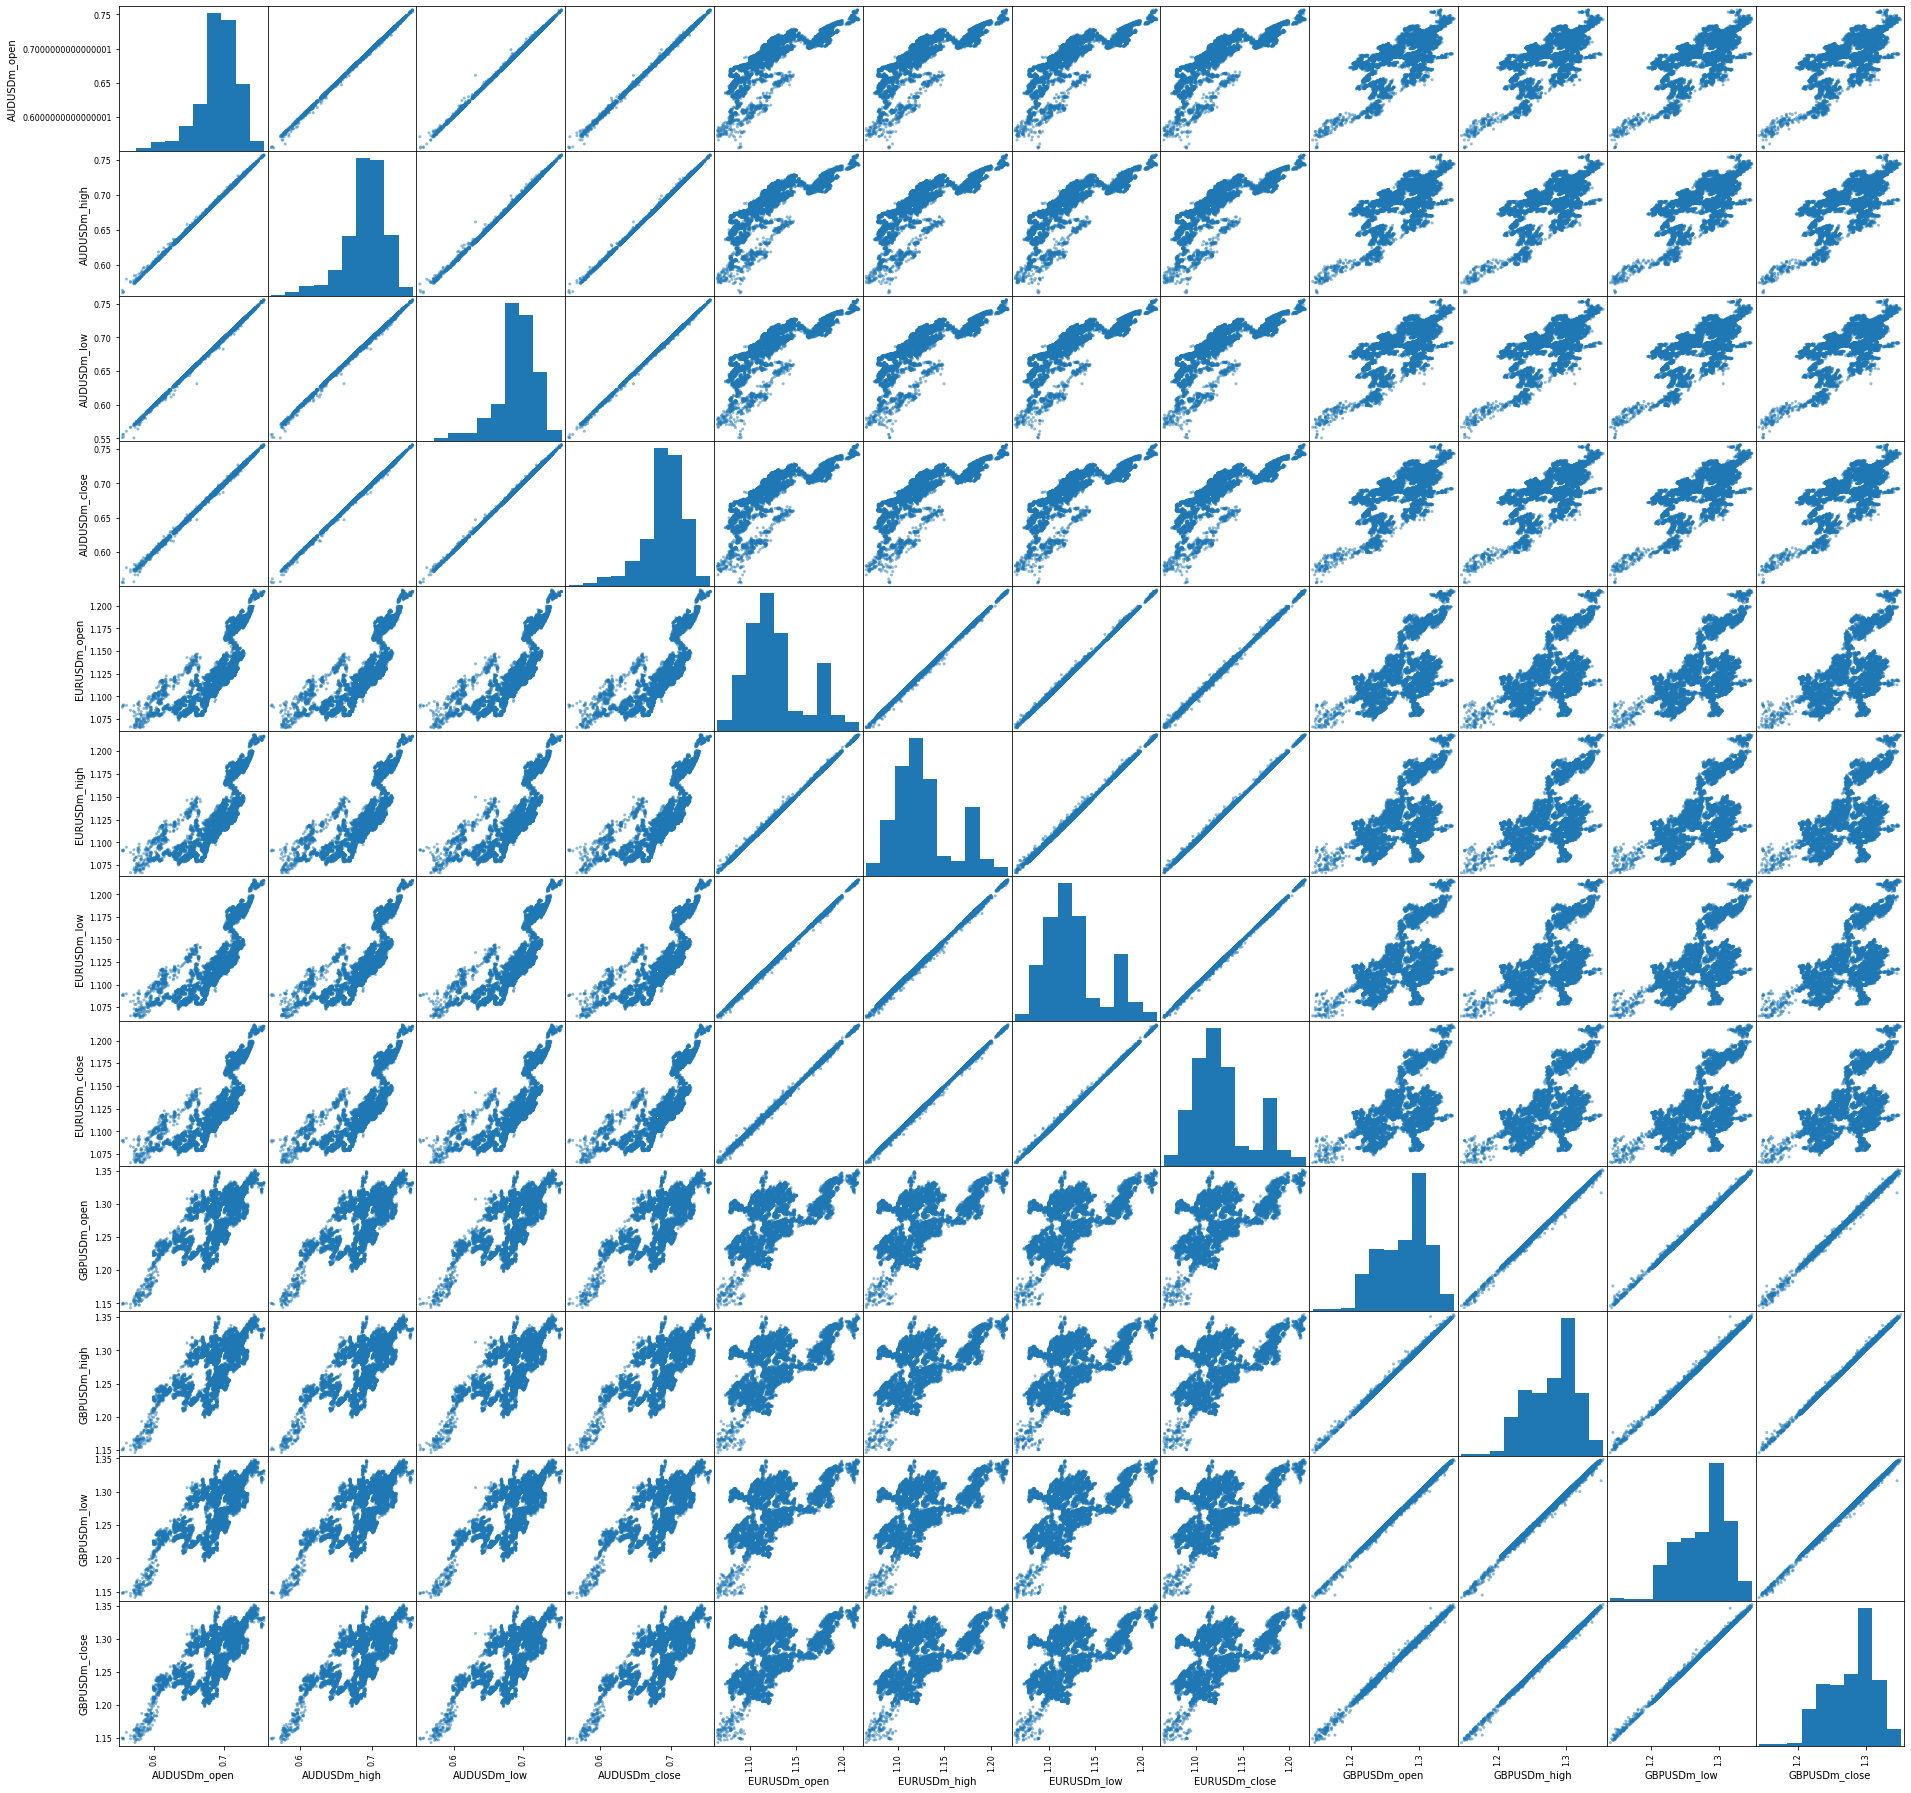

In [5]:
scatter_matrix(df, figsize=(32, 32))
plt.show()

# Pre-processing

## Define target

In [6]:

df = df.ffill()
df['return'] = df['EURUSDm_close'].shift(-1) - df['EURUSDm_close']

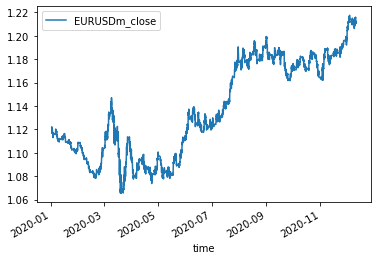

In [7]:
df.loc['2020-01-01':].plot(y='EURUSDm_close')

In [8]:
df['trend'] = df['EURUSDm_close'].shift(-1) > df['EURUSDm_open'].shift(-1)

df.tail(10)

,AUDUSDm_open,AUDUSDm_high,AUDUSDm_low,AUDUSDm_close,EURUSDm_open,EURUSDm_high,EURUSDm_low,EURUSDm_close,GBPUSDm_open,GBPUSDm_high,GBPUSDm_low,GBPUSDm_close,return,trend
time,,,,,,,,,,,,,,
2020-12-11 12:00:00,0.75287,0.75340,0.75233,0.75322,1.21215,1.21296,1.21135,1.21257,1.31826,1.31904,1.31600,1.31653,-0.00104,False
2020-12-11 13:00:00,0.75322,0.75394,0.75293,0.75354,1.21258,1.21298,1.21136,1.21153,1.31653,1.31829,1.31339,1.31801,0.00015,True
2020-12-11 14:00:00,0.75354,0.75438,0.75295,0.75315,1.21151,1.21327,1.21108,1.21168,1.31799,1.32219,1.31750,1.32051,-0.00105,False
2020-12-11 15:00:00,0.75313,0.75421,0.75306,0.75343,1.21166,1.21287,1.21049,1.21063,1.32048,1.32548,1.32039,1.32153,0.00056,True
2020-12-11 16:00:00,0.75344,0.75433,0.75292,0.75306,1.21063,1.21152,1.21056,1.21119,1.32155,1.32312,1.31921,1.31939,0.00042,True
2020-12-11 17:00:00,0.75306,0.75310,0.75255,0.75297,1.21119,1.21175,1.21077,1.21161,1.31940,1.32256,1.31884,1.32253,-0.00005,False
2020-12-11 18:00:00,0.75296,0.75349,0.75270,0.75346,1.21161,1.21166,1.21106,1.21156,1.32253,1.32287,1.32105,1.32245,-0.00029,False
2020-12-11 19:00:00,0.75346,0.75385,0.75325,0.75356,1.21158,1.21198,1.21121,1.21127,1.32246,1.32268,1.32138,1.32264,0.00040,True
2020-12-11 20:00:00,0.75356,0.75370,0.75294,0.75354,1.21127,1.21181,1.21123,1.21167,1.32261,1.32267,1.32146,1.32262,-0.00103,False


In [9]:
df.dropna(inplace=True)

## Feature Engineering

In [10]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = df[ohlc_cols].copy()
Y = df['trend'].copy()

In [18]:
# X['macd'] = ta.trend.MACD(X['close']).macd()

In [19]:
lookback_steps = [1, 2, 3, 5, 8]
# ohlc = ['open', 'high', 'low', 'close']
lookback_cols = ohlc_cols
for lookback in lookback_steps:
    lookback_features = X[lookback_cols].shift(lookback)
    lookback_features.rename(columns=lambda col: f'p{lookback}_{col}', inplace=True)
    X[lookback_features.columns] = lookback_features

In [20]:
Y = Y[~X.isna().any(axis=1)]
X = X[~X.isna().any(axis=1)]

In [21]:
feature_scaler = StandardScaler()
X.loc[:, X.columns] = feature_scaler.fit_transform(X)

# target_scaler = StandardScaler()
# Y[:] = target_scaler.fit_transform(np.expand_dims(Y.values, axis=1))[:, 0]

In [22]:
test_start_date = '2020-04-01'

X_train = X.loc[: test_start_date]
Y_train = Y.loc[: test_start_date]

X_test = X.loc[test_start_date:]
Y_test = Y.loc[test_start_date:]

train_df = df.loc[: test_start_date]
test_df = df.loc[test_start_date:]

In [23]:

class TimeseriesTransformer:
    def __init__(self, timeseries_features):
        self.timeseries_features = timeseries_features
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_timeseries = np.empty((len(X), len(lookback_steps)+1, len(self.timeseries_features)), dtype=float)
        for timestep, lookback_step in enumerate(reversed(lookback_steps)):
            X_timeseries[:, timestep, :] = X[[f'p{lookback_step}_{col}' for col in self.timeseries_features]]
        X_timeseries[:, -1, :] = X[self.timeseries_features]
        return X_timeseries


In [24]:
X_train

,AUDUSDm_open,AUDUSDm_high,AUDUSDm_low,AUDUSDm_close,EURUSDm_open,EURUSDm_high,EURUSDm_low,EURUSDm_close,GBPUSDm_open,GBPUSDm_high,...,p8_AUDUSDm_low,p8_AUDUSDm_close,p8_EURUSDm_open,p8_EURUSDm_high,p8_EURUSDm_low,p8_EURUSDm_close,p8_GBPUSDm_open,p8_GBPUSDm_high,p8_GBPUSDm_low,p8_GBPUSDm_close
time,,,,,,,,,,,,,,,,,,,,,
2019-01-02 02:00:00,0.387688,0.369376,0.325994,0.353484,0.530559,0.515544,0.523403,0.511721,-0.105393,-0.132436,...,0.460997,0.448423,0.542871,0.528765,0.532241,0.531870,-0.067119,-0.087299,-0.114917,-0.100013
2019-01-02 03:00:00,0.353082,0.334581,0.347122,0.338069,0.511356,0.500765,0.529390,0.512035,-0.151803,-0.172818,...,0.458608,0.451510,0.532775,0.523722,0.525293,0.512629,-0.101243,-0.111988,-0.117427,-0.117075
2019-01-02 04:00:00,0.338349,0.353529,0.332810,0.366845,0.512300,0.495104,0.523088,0.510147,-0.145093,-0.160199,...,0.465433,0.459401,0.513215,0.527504,0.530030,0.539125,-0.116348,-0.093752,-0.127466,-0.084351
2019-01-02 05:00:00,0.366788,0.385912,0.380517,0.390482,0.510096,0.593530,0.530336,0.611497,-0.135308,-0.097663,...,0.468504,0.454941,0.540032,0.543261,0.560662,0.547642,-0.084181,-0.107780,-0.073645,-0.101971
2019-01-02 06:00:00,0.391115,0.436898,0.406756,0.429193,0.611464,0.652019,0.629595,0.637936,-0.073801,-0.054757,...,0.466116,0.458372,0.548234,0.559018,0.568557,0.576031,-0.101803,-0.095154,-0.075039,-0.079596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01 19:00:00,-2.879332,-2.880621,-2.857442,-2.856764,-1.113038,-1.041656,-1.095943,-1.054488,-1.156333,-1.101325,...,-2.889081,-2.910530,-1.072758,-1.071227,-1.101385,-1.077485,-1.127214,-1.104916,-1.130266,-1.116406
2020-04-01 20:00:00,-2.857746,-2.890956,-2.862554,-2.879374,-1.055113,-1.004550,-1.039223,-1.008848,-1.081406,-1.099082,...,-2.926960,-2.963019,-1.077490,-1.091712,-1.121912,-1.112499,-1.116026,-1.114735,-1.152854,-1.110812
2020-04-01 21:00:00,-2.881388,-2.913349,-2.873118,-2.899586,-1.011670,-1.022789,-1.054979,-1.068966,-1.160806,-1.117871,...,-2.956991,-2.898180,-1.112825,-1.119444,-1.122544,-1.112183,-1.110712,-1.026918,-1.095687,-0.997818


# Model building

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
import lightgbm as lgb

from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import mean_squared_error, r2_score

In [58]:
def build_lstm_model():
    regressor = Sequential([
        LSTM(64, input_shape=(len(lookback_steps)+1, len(lookback_cols)), activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    regressor.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    return regressor


In [59]:
# regressor = LogisticRegression()
# regressor = RandomForestClassifier(n_estimators=16, verbose=10)
# regressor = SVR(kernel='linear')
# regressor = MLPRegressor(hidden_layer_sizes=100, )
regressor = Pipeline([('TimeseriesTransformer', TimeseriesTransformer(ohlc_cols)),
                      ('LSTM', KerasRegressor(build_fn=build_lstm_model,
                                              epochs=80,
                                              batch_size=32))
                      ])
sample_weight = np.linspace(0.5, 1, len(X_train)) 
regressor.fit(X_train, Y_train)

Epoch 1/80
243/243 [==============================] - 1s 3ms/step - loss: 0.6949 - acc: 0.4977
Epoch 2/80
243/243 [==============================] - 1s 2ms/step - loss: 0.6934 - acc: 0.5040
Epoch 3/80
243/243 [==============================] - 1s 2ms/step - loss: 0.6943 - acc: 0.4959
Epoch 4/80
243/243 [==============================] - 1s 2ms/step - loss: 0.6935 - acc: 0.4987
Epoch 5/80
243/243 [==============================] - 1s 2ms/step - loss: 0.6931 - acc: 0.5075
Epoch 6/80
243/243 [==============================] - 1s 2ms/step - loss: 0.6933 - acc: 0.5041
Epoch 7/80
243/243 [==============================] - 1s 2ms/step - loss: 0.6930 - acc: 0.5088
Epoch 8/80
243/243 [==============================] - 1s 2ms/step - loss: 0.6930 - acc: 0.5036
Epoch 9/80
243/243 [==============================] - 1s 2ms/step - loss: 0.6932 - acc: 0.4975
Epoch 10/80
243/243 [==============================] - 1s 2ms/step - loss: 0.6929 - acc: 0.5125
Epoch 11/80
243/243 [============================

Pipeline(steps=[('TimeseriesTransformer',
                 <__main__.TimeseriesTransformer object at 0x00000285CDCD2640>),
                ('LSTM',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x00000285CDCD2910>)])

In [46]:
prediction = regressor.predict(X_test)
# prediction = target_scaler.inverse_transform(prediction)

test_df['prediction'] = prediction
# test_df['prediction'] = prediction * test_df['close'] + test_df['close']

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
<ipython-input-46-a01b9c571dce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [47]:
test_df['prediction']

time
2020-04-01 00:00:00    False
2020-04-01 01:00:00     True
2020-04-01 02:00:00    False
2020-04-01 03:00:00    False
2020-04-01 04:00:00     True
                       ...  
2020-12-11 16:00:00    False
2020-12-11 17:00:00    False
2020-12-11 18:00:00    False
2020-12-11 19:00:00    False
2020-12-11 20:00:00    False
Name: prediction, Length: 4388, dtype: bool

In [48]:
(~(test_df['trend'] ^ test_df['prediction'])).sum() / len(test_df)

0.5015952597994531

In [49]:
# test_df['action'] = test_df['prediction'] > test_df['close']
test_df['action'] = test_df['prediction']
test_df['action'] = np.where(test_df['action'], 1, -1)

<ipython-input-49-395bb656b3d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['action'] = test_df['prediction']
<ipython-input-49-395bb656b3d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['action'] = np.where(test_df['action'], 1, -1)


<ipython-input-50-e3cb665cf00c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['margin'] = test_df['return'] * test_df['action']


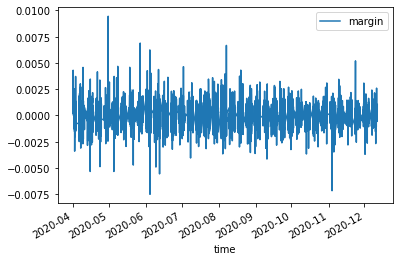

In [50]:
test_df['margin'] = test_df['return'] * test_df['action']
test_df.plot(y='margin')


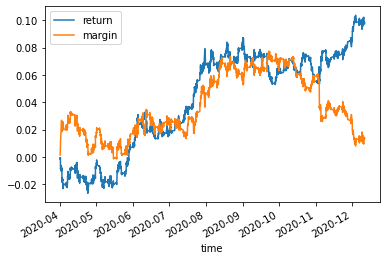

In [51]:
result = test_df[['return', 'margin']]
result = result / test_df['EURUSDm_close'].values[0]


result.cumsum().plot()

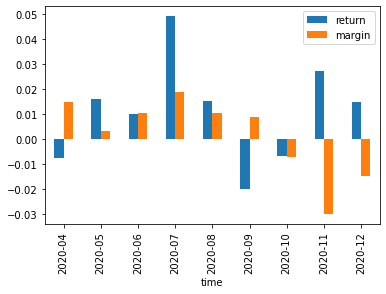

In [52]:
result.resample('M', kind='period').sum().plot(kind='bar')